<a href="https://colab.research.google.com/github/allnes/age_classifier/blob/master/exp_may/opencv_128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Connect to Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
age_classifier	LICENSE.txt  rcv1.ipynb        summaries
checkpoints	makefile     README.md	       trials
lib		nips2016     requirements.txt  usage.ipynb
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/allnes/cnn_graph
 * branch            graph_train -> FETCH_HEAD
   a32d5bf..2287e36  graph_train -> origin/graph_train
Updating a32d5bf..2287e36
Fast-forward
 age_classifier/age_classes_coarsening.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)
['arr_0', 'arr_1']
(729, 16384)
(729,)
--> Reshape data


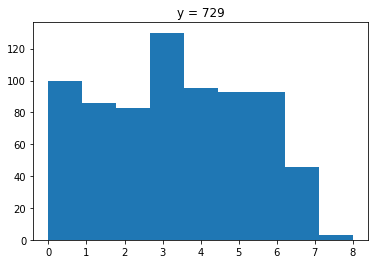

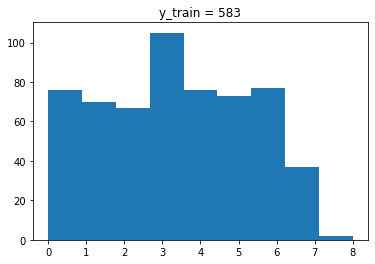

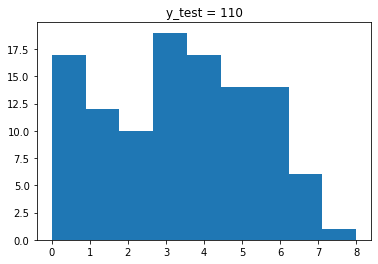

[0 1 2 3 4 5 6 7 8]
--> Get distance graph
d = |V| = 128, k|V| < |E| = 128452


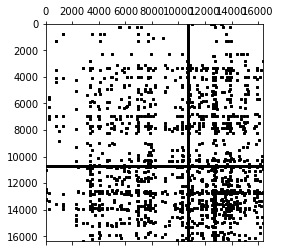

--> Get laplacian matrix


/content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/coarsening.py:152: RuntimeWarning: divide by zero encountered in true_divide
  tval = vv[rs+jj] * (1.0/weights[tid] + 1.0/weights[nid])
/content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/coarsening.py:152: RuntimeWarning: divide by zero encountered in true_divide
  tval = vv[rs+jj] * (1.0/weights[tid] + 1.0/weights[nid])
/content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/coarsening.py:152: RuntimeWarning: divide by zero encountered in true_divide
  tval = vv[rs+jj] * (1.0/weights[tid] + 1.0/weights[nid])


Layer 0: M_0 = |V| = 125728 nodes (109344 added),|E| = 64226 edges
Layer 1: M_1 = |V| = 62864 nodes (46691 added),|E| = 64187 edges
Layer 2: M_2 = |V| = 31432 nodes (15465 added),|E| = 63541 edges
Layer 3: M_3 = |V| = 15716 nodes (0 added),|E| = 62973 edges
(583, 125728)
(36, 125728)
(110, 125728)
NN architecture
  input: M_0 = 125728
  layer 1: cgconv1
    representation: M_0 * F_1 / p_1 = 125728 * 32 / 4 = 1005824
    weights: F_0 * F_1 * K_1 = 1 * 32 * 16 = 512
    biases: M_1 * F_1 = 125728 * 32 = 4023296
  layer 2: cgconv2
    representation: M_1 * F_2 / p_2 = 31432 * 32 / 2 = 502912
    weights: F_1 * F_2 * K_2 = 32 * 32 * 16 = 16384
    biases: M_2 * F_2 = 31432 * 32 = 1005824
  layer 3: fc1
    representation: M_3 = 2000
    weights: M_2 * M_3 = 502912 * 2000 = 1005824000
    biases: M_3 = 2000
  layer 4: logits (softmax)
    representation: M_4 = 9
    weights: M_3 * M_4 = 2000 * 9 = 18000
    biases: M_4 = 9







Instructions for updating:
Please use `rate` instead of `keep

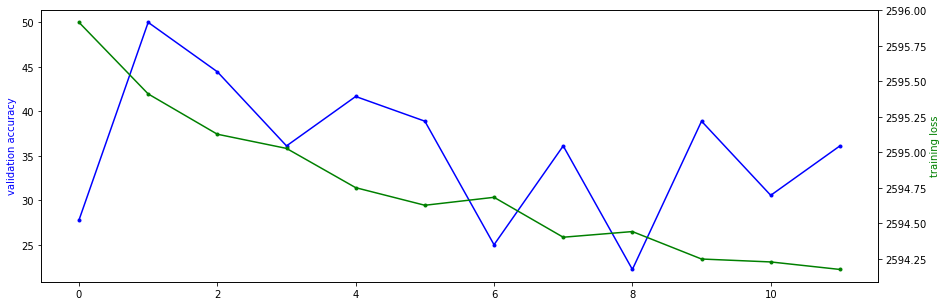

Time per step: 4686.60 ms
(110, 125728) (110,)
############ Class 0
(17, 125728)
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/../checkpoints/demo/model-1166
accuracy: 76.47 (13 / 17), f1 (weighted): 86.67, loss: 3.66e+03
time: 45s (wall 8s)
############ Class 1
(12, 125728)
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/../checkpoints/demo/model-1166
accuracy: 25.00 (3 / 12), f1 (weighted): 40.00, loss: 2.59e+03
time: 28s (wall 209s)
############ Class 2
(10, 125728)
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/../checkpoints/demo/model-1166
accuracy: 20.00 (2 / 10), f1 (weighted): 33.33, loss: 3.11e+03
time: 28s (wall 203s)
############ Class 3
(19, 125728)
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/../checkpoints/demo/model-1166
accuracy: 63.16 (12 / 19), f1 (weighted

In [3]:
%tensorflow_version 1.x

from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/')
!ls

# !git clone https://github.com/mdeff/cnn_graph
# !git status
# !git fetch
# !git checkout graph_train
!git pull origin graph_train


%run age_classifier/age_classes_coarsening \
  --path_project='/content/drive/My Drive/DL_DATA_GRAPH/' \
  --path_data='NEW/converted_data_resize_875_opencv_128.npz' \
  --zip_size=128

%matplotlib inline